# Time Series Wind Roses

When dealing with Air Quality Time Series, it is important to assess how distributions are affected by Wind Direction.

The Weather Toolbox provides a Wind object to ease such analysis.

## Introduction


### Imports

We import required packages:

In [1]:
import pandas as pd
from odapi.connectors import Irceline
from odapi.toolbox import Wind

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("brussels_2014.pickle").droplevel([1,2,3], axis=1)
client = Irceline()

## Roses and Boxplots

We will perform our analysis on the following series:

In [4]:
skeys = ['NO/41R001 (µg/m³)', 'PM-2.5/41N043 (µg/m³)', 'CO2/41R002 (ppm)',
          'O3/41R012 (µg/m³)', 'T/41R001 (°C)', 'WS/41R001 (m/s)']

**Note:** There is a difference between Goniometric and Trigonometric systems. By defaults, Weather methods expect to get Goniometric angles (common meteorological reference) instead of Trigonometric angles.

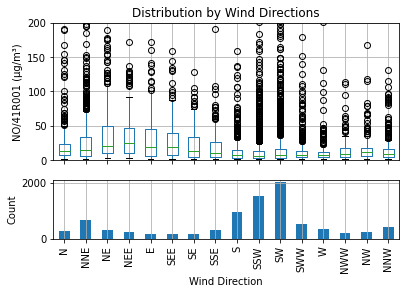

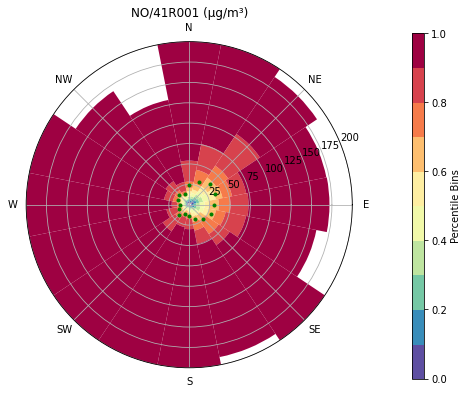

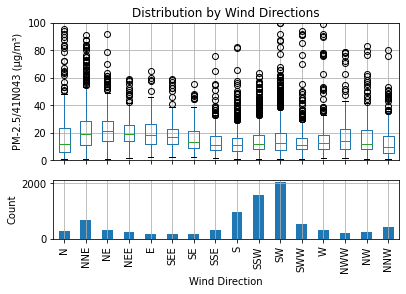

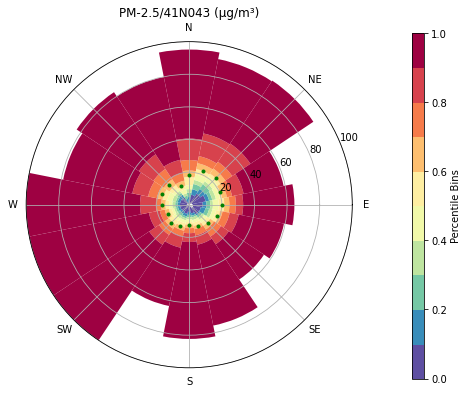

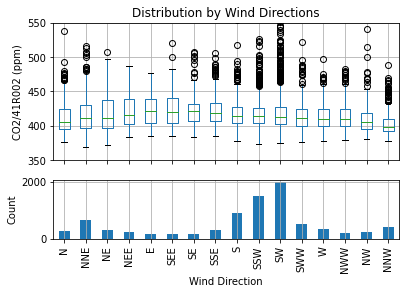

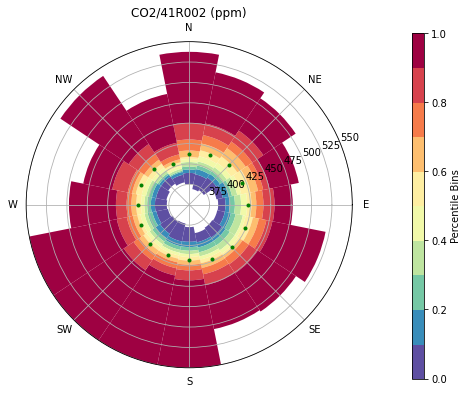

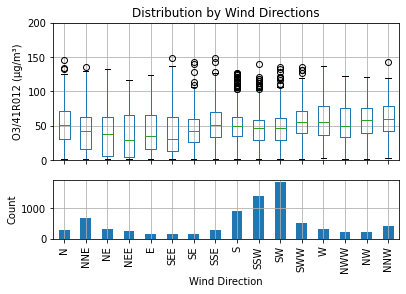

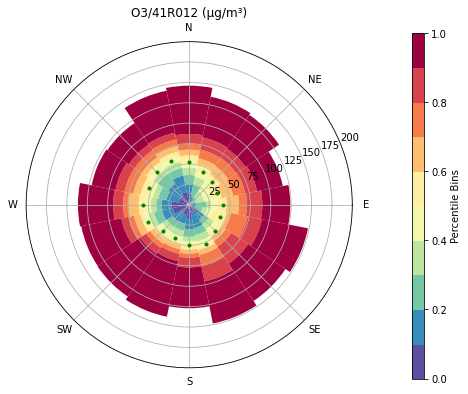

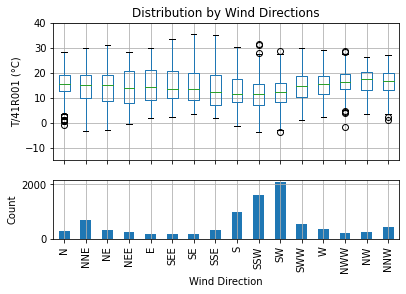

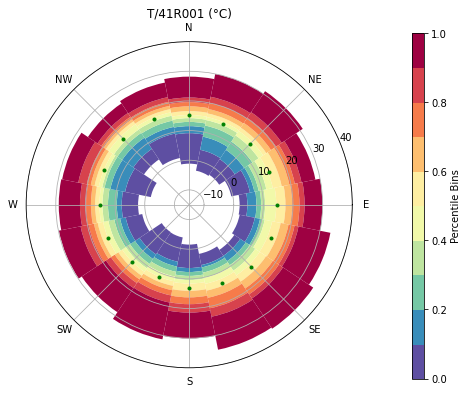

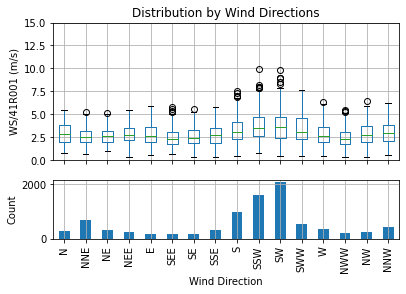

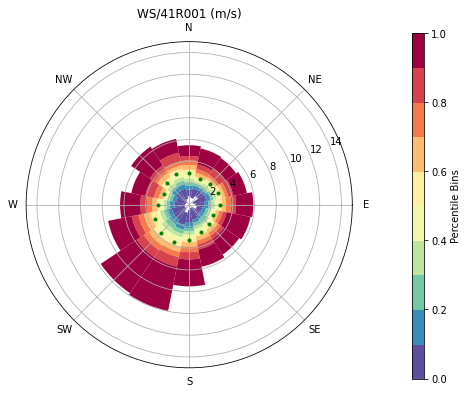

In [5]:
scales = client.scales()
for k in skeys:
    axe1 = Wind.boxplot(data, k, theta='WD/41R001 (°G)')
    axe1[0].set_ylim(scales[k.split('/')[0]])
    axe2 = Wind.rose(data, k, theta='WD/41R001 (°G)')
    axe2.set_ylim(scales[k.split('/')[0]])